In [9]:
import pandas as pd
import pipreqs
from sklearn.model_selection import train_test_split
data = pd.read_csv('..\data_related/data/mid_data/exclude0_data_filtered.csv')
x=data[['nor_pledge_ratio','nor_money_pledged','nor_pledge_goal']]
y=data['nor_back_num']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [31]:
#创建模型结构
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import random
from keras import regularizers
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import  mean_squared_error

np.random.seed(3) # 固定随机种子，使每次运行结果固定
random.set_seed(3)


# 创建模型结构：输入层的特征维数为3；1层k个神经元的relu隐藏层；线性的输出层；

for k in range(5,101,5):  # 网格搜索超参数：神经元数k

    model = tf.keras.models.Sequential()

    #model.add(BatchNormalization(input_dim=3))  # 输入层 批标准化

    model.add(Dense(k,
                    kernel_initializer='random_uniform',   # 均匀初始化
                    activation='relu',                     # relu激活函数
                    kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),  # L1及L2 正则项
                    use_bias=True))   # 隐藏层1

    model.add(Dropout(0.1)) # dropout法

    model.add(Dense(1,use_bias=True))  # 输出层
    #模型编译
    model.compile(optimizer='adam', loss='mse')
    #模型训练
    history = model.fit(x_train,
                        y_train,
                        epochs=500,              # 训练迭代次数
                        batch_size=50,           # 每epoch采样的batch大小
                        validation_split=0.1,   # 从训练集再拆分验证集，作为早停的衡量指标
                        callbacks=[EarlyStopping(monitor='val_loss', patience=20)],    #早停法
                        verbose=False)  # 不输出过程

    print(k,"验证集最优结果：",min(history.history['val_loss']))
    #model.summary()   #打印模型概述信息


5 验证集最优结果： 0.14273518323898315
10 验证集最优结果： 0.13879461586475372
15 验证集最优结果： 0.13910043239593506
20 验证集最优结果： 0.13897255063056946
25 验证集最优结果： 0.13897322118282318
30 验证集最优结果： 0.13699576258659363
35 验证集最优结果： 0.1380554735660553
40 验证集最优结果： 0.14179278910160065
45 验证集最优结果： 0.13717599213123322
50 验证集最优结果： 0.13877271115779877
55 验证集最优结果： 0.13708673417568207
60 验证集最优结果： 0.1416557878255844
65 验证集最优结果： 0.14283229410648346
70 验证集最优结果： 0.14016112685203552
75 验证集最优结果： 0.14001324772834778
80 验证集最优结果： 0.1421440839767456
85 验证集最优结果： 0.1374422162771225
90 验证集最优结果： 0.1372748166322708
95 验证集最优结果： 0.1380583643913269
100 验证集最优结果： 0.14046207070350647


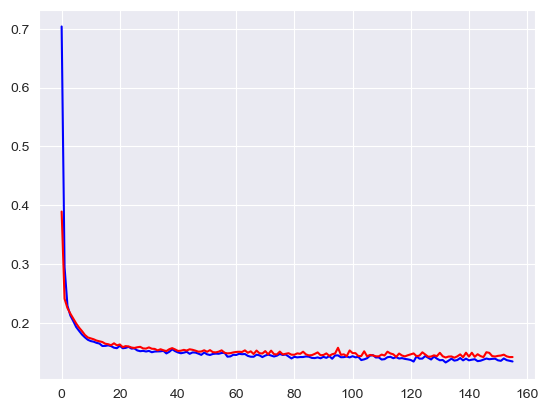

In [33]:

# 模型评估：拟合效果
plt.plot(history.history['loss'],c='blue')    # 蓝色线训练集损失
plt.plot(history.history['val_loss'],c='red') # 红色线验证集损失
plt.show()


8/8 [==============================] - 0s 1ms/step
R-squared 0.905726679467501
样本外R-squared 0.8818206455237917


Text(0, 0.5, 'real value')

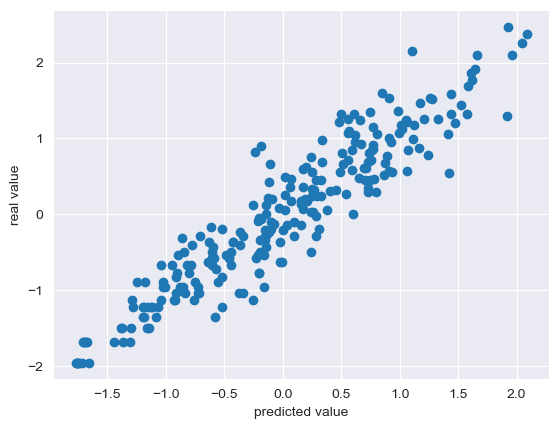

In [36]:
model = tf.keras.models.Sequential()

#model.add(BatchNormalization(input_dim=3))  # 输入层 批标准化

model.add(Dense(30,
                kernel_initializer='random_uniform',   # 均匀初始化
                activation='relu',                     # relu激活函数
                kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),  # L1及L2 正则项
                use_bias=True))   # 隐藏层1

model.add(Dropout(0.1)) # dropout法

model.add(Dense(1,use_bias=True))  # 输出层
#模型编译
model.compile(optimizer='adam', loss='mse')
#模型训练
history = model.fit(x_train,
                    y_train,
                    epochs=500,              # 训练迭代次数
                    batch_size=50,           # 每epoch采样的batch大小
                    validation_split=0.1,   # 从训练集再拆分验证集，作为早停的衡量指标
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)],    #早停法
                    verbose=False)  # 不输出过程
out_of_sample_data=pd.read_csv('..\data_related/data/mid_data/res_1_filtered.csv')
oos_x=out_of_sample_data[['nor_pledge_ratio','nor_money_pledged','nor_pledge_goal']]
oos_y=out_of_sample_data['nor_back_num']
# 模型评估：测试集预测结果
pred_y = model.predict(x_test)[:,0]
oos_pred_y=model.predict(oos_x)[:,0]
#print("正确标签：",y_test)
#print("模型预测：",pred_y )

print("R-squared",1-mean_squared_error(y_test,pred_y )/np.var(y_test))
print("样本外R-squared",1-mean_squared_error(oos_y,oos_pred_y )/np.var(oos_y))

#绘图表示
import matplotlib.pyplot as plt

'''plt.scatter(y_test,pred_y)
plt.xlabel('predicted value')
plt.ylabel('real value')'''

plt.scatter(oos_pred_y,oos_y)
plt.xlabel('predicted value')
plt.ylabel('real value')

In [37]:
#版本问题，深度学习用不了shap
import shap

shap.initjs()
explainer=shap.DeepExplainer(history,x_train)

shap_values=explainer(x_train)
#print(shap_values[0])
shap.plots.waterfall(shap_values[0])
shap.summary_plot(shap_values,x_train)
shap.plots.bar(shap_values)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


AssertionError: <class 'keras.callbacks.History'> is not currently a supported model type!